<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Working With Time Series Data

---

### Learning Objectives
 
**After this lesson, you will be able to:**
- Identify time series data.
- Explain the challenges of working with time series data.
- Use the `datetime` library to represent dates as objects.
- Preprocess time series data with Pandas.

---

### Lesson Guide

#### Time Series Data
- [What is a Time Series](#A)
- [The Datetime Library](#B)
- [Preprocessing Time Series Data with Pandas](#C)
- [Independent Practice](#D)
----

Time Series
- Overview
- Datetime & TimeStamp Objects
- Data Exploration 
- Modeling 

<h2><a id="A">What is a Time Series?</a></h2>

A **time series** is a series of data points that's indexed (or listed, or graphed) in time order. Most commonly, a time series is a sequence that's taken at successive equally spaced points in time. Time series are often represented as a set of observations that have a time-bound relation, which is represented as an index.

Time series are commonly found in sales, analysis, stock market trends, economic phenomena, and social science problems.

These data sets are often investigated to evaluate the long-term trends, forecast the future, or perform some other form of analysis.

> **Check for Understanding:** List some examples of real-world time series data.

### Let's take a look at some Apple stock data to get a feel for what time series data look like.

In [433]:
import pandas as pd
from datetime import timedelta
%matplotlib inline

aapl = pd.read_csv("data/aapl.csv")

Take a high-level look at the data. What are we looking at?

In [434]:
aapl.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


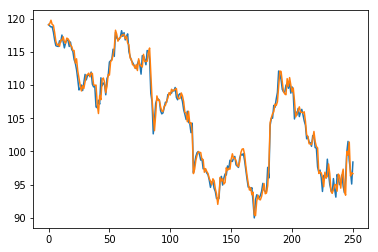

In [435]:
aapl.Open.plot()
aapl.Close.plot()

# i. Datetime and TimeStamps

As time is important to time series data, we will need to interpret these data in the ways that humans interpret them (which is many ways). 

Python's `DateTime` library is great for dealing with time-related data, and Pandas has incorporated this library into its own `datetime` series and objects.

In this lesson, we'll review these data types and learn a little more about each of them:

* `datetime` objects.
* `datetime` series.
* Timestamps.
* `timedelta()`.

### `datetime` Objects

Below, we'll load in the `DateTime` library, which we can use to create a `datetime` object by entering in the different components of the date as arguments.

In [436]:
# The datetime library is something you should already have from Anaconda.
from datetime import datetime

In [437]:
# Let's just set a random datetime — not the end of the world or anything.
lesson_date = datetime(2012, 12, 21, 12, 21, 12, 844089)

The components of the date are accessible via the object's attributes.

In [438]:
print("Micro-Second", lesson_date.microsecond)
print("Second", lesson_date.second)
print("Minute", lesson_date.minute)
print("Hour", lesson_date.hour)
print("Day", lesson_date.day)
print("Month",lesson_date.month)
print("Year", lesson_date.year)

Micro-Second 844089
Second 12
Minute 21
Hour 12
Day 21
Month 12
Year 2012


### `timedelta()`

Suppose we want to add time to or subtract time from a date. Maybe we're using time as an index and want to get everything that happened a week before a specific observation.

We can use a `timedelta` object to shift a `datetime` object. Here's an example:

In [439]:
# Import timedelta() from the DateTime library.
from datetime import timedelta

# Timedeltas represent time as an amount rather than as a fixed position.
offset = timedelta(days=1, seconds=20)

# The timedelta() has attributes that allow us to extract values from it.
print('offset days', offset.days)
print('offset seconds', offset.seconds)
print('offset microseconds', offset.microseconds)

offset days 1
offset seconds 20
offset microseconds 0


`datetime`'s `.now()` function will give you the `datetime` object of this very moment.

In [440]:
now = datetime.now()
print("Like Right Now: ", now)

Like Right Now:  2019-04-11 02:21:44.370113


The current time is particularly useful when using `timedelta()`.

In [441]:
print("Future: ", now + offset)
print("Past: ", now - offset)

Future:  2019-04-12 02:22:04.370113
Past:  2019-04-10 02:21:24.370113


### Guided Practice: Apple Stock Data

We can practice using `datetime` functions and objects using Apple stock data.

In [442]:
aapl.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


The `Date` column starts off as an object.

In [443]:
aapl.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

<h2>Preprocessing Time Series Data with Pandas</h2>

### Convert time data to a `datetime` object.

Overwrite the original `Date` column with one that's been converted to a `datetime` series.

In [444]:
aapl['Date'] = pd.to_datetime(aapl.Date)

We can see these changes reflected in the `Date` column structure.

In [445]:
aapl.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


We can also see that the `Date` object has changed. 

In [446]:
aapl.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

### The `.dt` Attribute

Pandas' `datetime` columns have a `.dt` attribute that allows you to access attributes that are specific to dates. For example:

    aapl.Date.dt.day
    aapl.Date.dt.month
    aapl.Date.dt.year
    aapl.Date.dt.weekday_name

And, there are many more!

In [447]:
aapl.Date.dt.weekday_name.head()

0       Friday
1     Thursday
2    Wednesday
3      Tuesday
4       Monday
Name: Date, dtype: object

In [448]:
aapl.Date.dt.dayofyear.head()

0    13
1    12
2    11
3    10
4     9
Name: Date, dtype: int64

Check out the Pandas `.dt` [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html) for more information.

### Timestamps

Timestamps are useful objects for comparisons. You can create a timestamp object using the `pd.to_datetime()` function and a string specifying the date. These objects are especially helpful when you need to perform logical filtering with dates.

In [449]:
ts = pd.to_datetime('1/1/2017')
ts

Timestamp('2017-01-01 00:00:00')

The main difference between a `datetime` object and a timestamp is that timestamps can be used as comparisons.

Let's use the timestamp `ts` as a comparison with our Apple stock data.

In [450]:
aapl.loc[aapl.Date >= ts, :].head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


We can even get the first and last dates from a time series.

In [451]:
aapl.Date.max() - aapl.Date.min()

Timedelta('360 days 00:00:00')

> **Check for Understanding:** Why do we convert the DataFrame column containing the time information into a `datetime` object?

### Set `datetime` to Index the DataFrame

After converting the column containing time data from object to `datetime`, it is also useful to make the index of the DataFrame a `datetime`.

In [452]:
aapl.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


Let's set the `Date` column as the index.

In [453]:
aapl.set_index('Date', inplace=True)

In [454]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-13,119.11,119.62,118.81,119.04,26111948
2017-01-12,118.90,119.30,118.21,119.25,27086220
2017-01-11,118.74,119.93,118.60,119.75,27588593
2017-01-10,118.77,119.38,118.30,119.11,24462051
2017-01-09,117.95,119.43,117.94,118.99,33561948


### Filtering by Date with Pandas

It is easy to filter by date using Pandas. Let's create a subset of data containing only the stock prices from 2017. We can specify the index as a string constant. 

In [459]:
aapl['2016-11'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-30,111.60,112.20,110.27,110.52,36162258
2016-11-29,110.78,112.03,110.07,111.46,28528750
2016-11-28,111.43,112.46,111.39,111.57,27193983
2016-11-25,111.47,111.87,110.95,111.79,11475922
2016-11-23,111.36,111.51,110.33,111.23,27426394


> **Recap:** The steps for preprocessing time series data are to:
* Convert time data to a `datetime` object.
* Set `datetime` to index the DataFrame.

With the date as an index you can now plot time series with the date automatically in the X axis

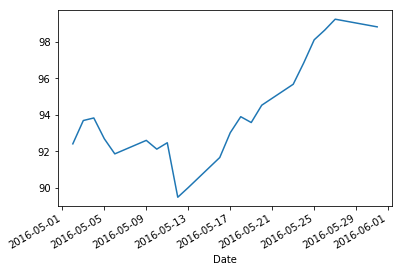

In [462]:
aapl['2016-05'].Low.plot()

# ii. Time Series: Data Exploration

What are some ways that you want to summarize the data?


- Data Summary
- Lagging
- Trend and Seasonality
- Autocorrelation
- Rolling Statistics
- Expanding Mean
- Exponentially Weighted Windows

### a. Data Summary

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (9,5)

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [24]:
data['Year'] = data.index.year
data['Month'] = data.index.month

data['2015-05'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-05-31,1,7,0,0,0,0,0,0,2015,5
2015-05-31,2,7,0,0,0,0,0,0,2015,5
2015-05-31,3,7,0,0,0,0,0,0,2015,5
2015-05-31,4,7,0,0,0,0,0,0,2015,5
2015-05-31,5,7,0,0,0,0,0,0,2015,5


In [25]:
data.shape

(1017209, 10)

In [26]:
store1_data = data[data['Store'] == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


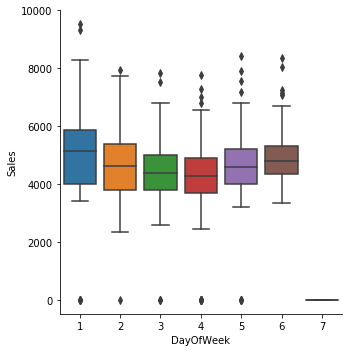

In [27]:
sns.factorplot(
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box',
)

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


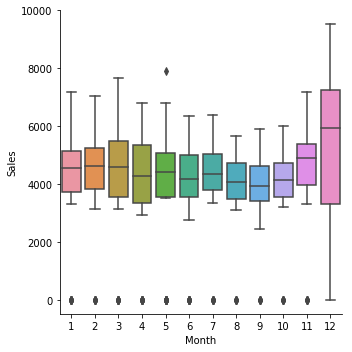

In [28]:
sns.factorplot(
    x='Month',
    y='Sales',
    data=store1_data,
    kind='box',
)

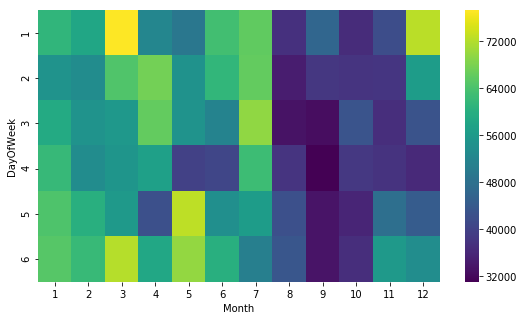

In [29]:
to_heat = store1_data[store1_data.DayOfWeek != 7].groupby(['DayOfWeek', 'Month']).sum()['Sales'].unstack()
sns.heatmap(to_heat, cmap = 'viridis')

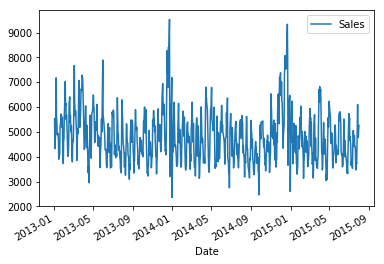

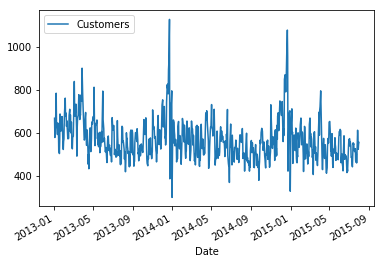

In [465]:
# Filter to days Store 1 was open.
store1_open_data = store1_data[store1_data['Open']==1]
store1_open_data[['Sales']].plot()
store1_open_data[['Customers']].plot()

### b. Shifting and Lagging Time Series Data

Another common operation on time series data is shifting or lagging values backward and forward in time. This can help us calculate the percentage of change from sample to sample. Pandas has a `.shift()` method for shifting the data in a DataFrame.

Let's take a look at the Rossman data when we apply lagged features. 

In [466]:
shifted_forward = store1_data.shift(1)
shifted_forward.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-30,1.0,5.0,5263.0,555.0,1.0,1.0,0,1.0
2015-07-29,1.0,4.0,5020.0,546.0,1.0,1.0,0,1.0
2015-07-28,1.0,3.0,4782.0,523.0,1.0,1.0,0,1.0
2015-07-27,1.0,2.0,5011.0,560.0,1.0,1.0,0,1.0


In [467]:
shifted_forward = store1_data.shift(3)
shifted_forward.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-28,1.0,5.0,5263.0,555.0,1.0,1.0,0,1.0
2015-07-27,1.0,4.0,5020.0,546.0,1.0,1.0,0,1.0


Lags can be used to calculate the changes in the values you are tracking with your time series data. In this case, we can use Pandas' `.shift()` method to look at the changes in sales. 

In [468]:
store1_data['Prev Day Sales'] = store1_data['Sales'].shift(1).copy(deep = True)
store1_data.head()

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Prev Day Sales
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,NaN
2015-07-30,1,4,5020,546,1,1,0,1,5263.0
2015-07-29,1,3,4782,523,1,1,0,1,5020.0
2015-07-28,1,2,5011,560,1,1,0,1,4782.0
2015-07-27,1,1,6102,612,1,1,0,1,5011.0


In [469]:
store1_data['Sales Change'] = store1_data['Sales'] - store1_data['Prev Day Sales'].copy(deep = True)
store1_data.head()

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Prev Day Sales,Sales Change
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,NaN,NaN
2015-07-30,1,4,5020,546,1,1,0,1,5263.0,-243.0
2015-07-29,1,3,4782,523,1,1,0,1,5020.0,-238.0
2015-07-28,1,2,5011,560,1,1,0,1,4782.0,229.0
2015-07-27,1,1,6102,612,1,1,0,1,5011.0,1091.0


Summary:
    
- Using datetime and timestamp objects to help with easily filter and use dates
- Making the date as the index allows you to plot the data and use them for future time series libraries
- We can use boxplots and heatmaps to visualize some metric over segments of time
- It is possible to compare different parts of time series data with shift

## b. Trend and Seasonality

**Question:** What constitutes a trend in data? Is linearity required for a trend?

- A trend is any long-term change in the value we're measuring. Trends may “change direction,” going from an increasing trend to a decreasing trend.

- Trends can only be measured within the scope of the data collected; there may be trends that are unmeasurable if the data are not complete.

An example of an upward trend:
![](/assets/images/trend-line2.png)

- When patterns repeat over *known, fixed periods* of time within a data set, we call this **seasonality**.

- A seasonal pattern exists when a series is influenced by factors related to the cyclic nature of time — i.e., time of month, quarter, year, etc. Seasonality is of a fixed and known period, otherwise it is not truly seasonality. Additionally, it must be either attributed to another factor or counted as a set of anomalous events in the data.

>  Can you think of some seasonal patterns from your own experience?


### The easiest way to visualize trends is by drawing trend lines.

       WeekOf  Hits
0  2004-01-04    53
1  2004-01-11    53
2  2004-01-18    54
3  2004-01-25    53
4  2004-02-01    52


Text(0, 0.5, 'Hits')

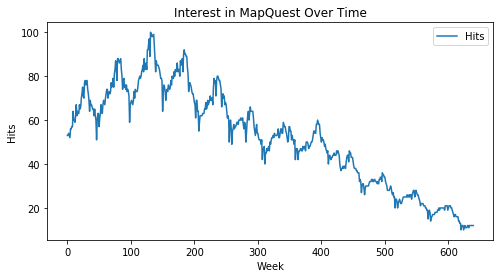

In [35]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

# Import the data.
df = pd.read_csv('data/mapquest_google_trends.csv')

# Clean/organize the data. 
df.columns = ['WeekOf', 'Hits']
print(df.head())
plt.rcParams["figure.figsize"] = [8,4]
ax = df.plot(title = "Interest in MapQuest Over Time")
ax.set_xlabel("Week")
ax.set_ylabel("Hits")

Next, we need to compute a coefficient and intercept for our line. NumPy's `polyfit()` method can do this.

Then, define our polynomial function using that coefficient. We can do this on a single dimension using NumPy's `poly1d()` method.

In [36]:
line_coef = np.polyfit(df.index,df['Hits'],1)
print(line_coef)

polynomial = np.poly1d(line_coef)
# The intercept is ~86.59, the slope is ~0.11.

# Let's take a look at the trendline values at specific points:
print(polynomial(0))
print(polynomial(1))

[-0.10841388 86.58979622]
86.58979621684865
86.48138233980062


### Now, plot our trendline over the data.

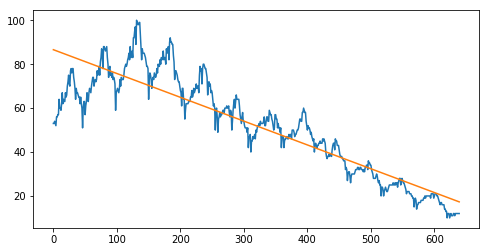

In [37]:
# Plot the time series.
plt.plot(df.index, df['Hits'])
# Plot the least squares minimizing line.
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(df.index, polynomial(df.index))

Looks like a second-order polynomial might fit our data even better. Let's try that out.

In [38]:
line_coef = np.polyfit(df.index,df['Hits'],2)
print(line_coef)

second_polynomial = np.poly1d(line_coef)

[-1.84964781e-04  9.77861827e-03  7.40219942e+01]


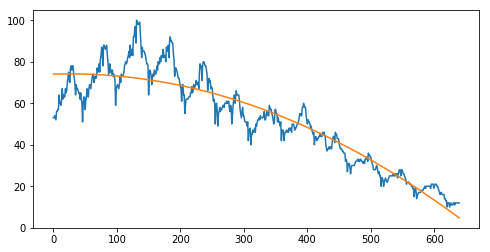

In [39]:
plt.rcParams["figure.figsize"] = [8,4]
# Plot the time series.
plt.plot(df.index, df['Hits'])
# Plot the least squares minimizing line.
plt.plot(df.index, second_polynomial(df.index))

> **Question:** Can you think of any other underlying patterns that might cause trends in time series data? What might cause seasonality in a time series?

In [40]:
df.index = pd.to_datetime(df.WeekOf)

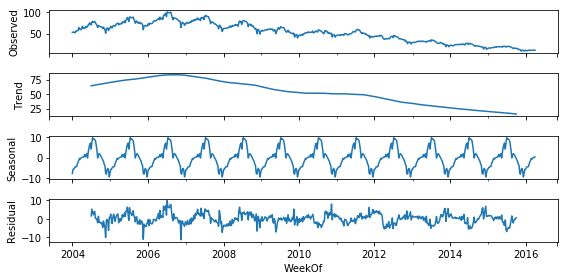

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df['Hits']
result = seasonal_decompose(series, model='additive')
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)

result.plot()
plt.show()

## c. Autocorrelation

Autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values that occur later in time.

Examples of autocorrelation include:

    In stock market data, the stock price at one point is correlated with the stock 
    price of the point that's directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days, to more
    or less of an extent.

> **Check:** What are some examples of autocorrelation that you can think of in the real world?

### How Do We Compute Autocorrelation?

${\Huge R(k) = \frac{\operatorname{E}[(X_{t} - \mu)(X_{t-k} - \mu)]}{\sigma^2}}^*$

To compute autocorrelation, we fix a **lag**, _k_, which is the delta between the given point and the prior point used to compute the [correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient).

With a _k_ value of one, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one that's 10 time points earlier.

$^*$ Note that this formula assumes *stationarity*, which we'll discuss shortly.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (8,4)

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
store1_data = data[data['Store'] == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


### Computing Autocorrelation

To compute autocorrelation using the Pandas `.autocorr()` function, we enter the parameter for `lag`. Recall that **lag** is the delta between the given point and the prior point used to compute the autocorrelation. 

With a _k_ value of one, we'd compute how correlated a value is with the value that's immediately prior. With a _k_ value of 10, we'd compute how correlated a variable is with the value that's 10 time points prior.`m

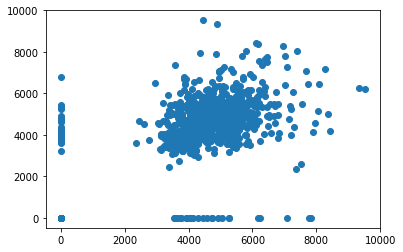

In [483]:
plt.scatter(store1_data.Sales, store1_data.Sales.shift(14))

In [486]:
np.corrcoef(store1_data.Sales[14:], store1_data.Sales.shift(14)[14:])[0, 1]

0.7248992679736445

In [488]:
store1_data['Sales'].autocorr(lag=14)

0.7248992679736445

<h2><a id = "B">Plotting Autocorrelation Functions Using StatsModels and Pandas</a></h2>

Pandas provides convenience plots for autocorrelations.

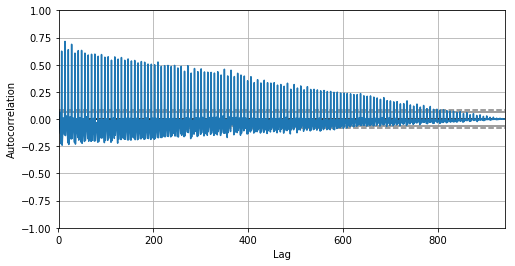

In [45]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(store1_data.Sales)

In [489]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

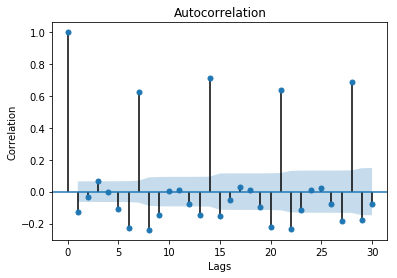

In [491]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(store1_data.Sales.values, lags=30)
plt.ylabel('Correlation')
plt.xlabel('Lags')
plt.show()

This plots the correlation between the series and a lagged series for the lags indicated on the horizontal axis. For instance, at `0`, the series will be completely correlated with itself, so the blue dot is at `1.0`. The points that fall outside of the blue indicate significant correlation values. Big jumps in autocorrelation appear at lags that are multiples of seven. Our sales data are daily, so it makes a lot of sense that a single Monday's sales would be correlated with the prior Monday's (and the one before it... and so on).

Our data set here isn't *stationary* (the mean, the variance, and/or the covariance vary over time), so it isn't appropriate to try to diagnose what forecasting model we should use. However, we can see the seasonality of the data set clearly in the ACF.

In [492]:
acf(store1_data.Sales.values)

array([ 1.        , -0.12703786, -0.03469319,  0.06454937, -0.00180766,
       -0.10904274, -0.22783504,  0.6248786 , -0.2401515 , -0.14869745,
        0.00624578,  0.01006485, -0.07707318, -0.14363042,  0.71435429,
       -0.15188393, -0.05551585,  0.02901103,  0.01113764, -0.09400308,
       -0.21875595,  0.63865175, -0.23360339, -0.11384778,  0.00788378,
        0.02095157, -0.07841381, -0.18374454,  0.68804836, -0.17930762,
       -0.07734379,  0.01060628, -0.00112696, -0.09014802, -0.21435881,
        0.60668328, -0.230107  , -0.12860469,  0.00378231,  0.00237381,
       -0.10721685])

### Partial Autocorrelation and the Partial Autocorrelation Function (PACF)

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of previous lags._

In [493]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

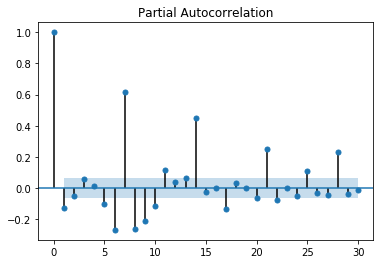

In [496]:
plot_pacf(store1_data.Sales.values, lags=30)
plt.show()

This plots the correlation at a given lag (indicated by the horizontal axis), controlling for all of the previous lags. We continue to see big jumps in correlation at the weekly time lags, an indicator that seasonality is still present in our time series.

In [499]:
pacf(store1_data.Sales.values)

array([ 1.00000000e+00, -1.27172867e-01, -5.17773322e-02,  5.45466222e-02,
        1.23214062e-02, -1.05814185e-01, -2.69339271e-01,  6.13891806e-01,
       -2.64313948e-01, -2.12840451e-01, -1.14091049e-01,  1.16903523e-01,
        3.98957387e-02,  6.13519367e-02,  4.48132326e-01, -2.58046698e-02,
       -7.87918641e-04, -1.32845421e-01,  3.26825588e-02,  2.08959582e-03,
       -6.67821339e-02,  2.51756307e-01, -8.03613671e-02,  3.00956887e-03,
       -5.04939348e-02,  1.07025969e-01, -3.22519598e-02, -4.38687145e-02,
        2.31052301e-01, -4.12160559e-02, -1.29869374e-02, -1.28248009e-01,
        1.92976513e-02,  2.41335134e-02, -1.38720582e-02,  4.87918471e-02,
       -6.34587157e-02, -3.56958681e-02, -2.05192404e-02,  1.72396841e-02,
       -1.12545098e-01])

It's done by finding the correlation between the new lag to the residuals of the previous lag

![](assets/pacf_pt1.png)

![](assets/pacf_pt2.png)

> **Check:** How might seasonality in a data set (monthly, weekly, etc.) show up in autocorrelation plots?

### d. Rolling Statistics



With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. 

E.g., to understand holidays sales, we don't want to compare sales data in late December with the entire month but instead with a few days immediately surrounding it. We can do this using rolling averages.

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.



### Parameters for `rolling()` Functions

`rolling().mean()` (as well as `rolling().median())` can take the following parameters:

* The first indicates the time series to aggregate.
* `window` indicates the number of periods to include in the average.
* `center` indicates whether the window should be centered on the date or use data prior to that date.


#### Calculate the rolling daily sum over all stores.

Use the `.resample()` function to calculate the daily total over all of the stores.

In [52]:
daily_store_sales = data[['Sales']].resample('D').sum()

In [53]:
daily_store_sales.rolling( window=3, center=True).mean().head()

,Sales
Date,
2013-01-01,NaN
2013-01-02,4.464961e+06
2013-01-03,6.645534e+06
2013-01-04,6.312789e+06
2013-01-05,4.244817e+06


In [54]:
daily_store_sales.rolling( window=7, center=True).mean()['2015'].head()

,Sales
Date,
2015-01-01,4.698837e+06
2015-01-02,5.272034e+06
2015-01-03,5.147139e+06
2015-01-04,5.822320e+06
2015-01-05,6.896103e+06


Instead of plotting the full time series, we can plot the rolling mean instead, which smooths random changes in sales and removes outliers, helping us identify larger trends.

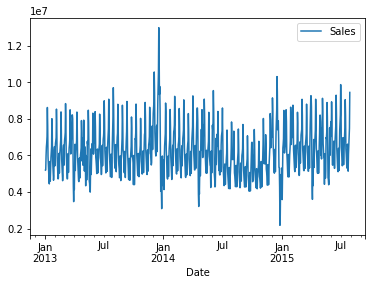

In [501]:
daily_store_sales.rolling(window=5, center=True).mean().plot()

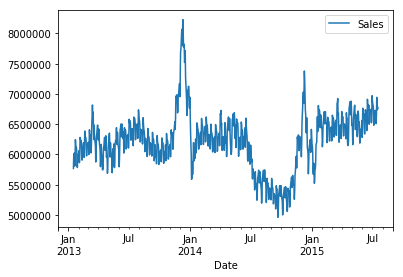

In [502]:
daily_store_sales.rolling(window=30, center=True).mean().plot()

## e. Expanding Mean

The expanding mean simply uses all of the data points up to the current time to calculate the mean, as opposed to a moving window.

#### Calculate and plot the expanding mean below. Resample by quarter.

In [56]:
rolling_mean = data.Sales.resample('Q').sum().rolling(window=1, center=False).mean()
expanding_mean = data.Sales.resample('Q').sum().expanding().mean()

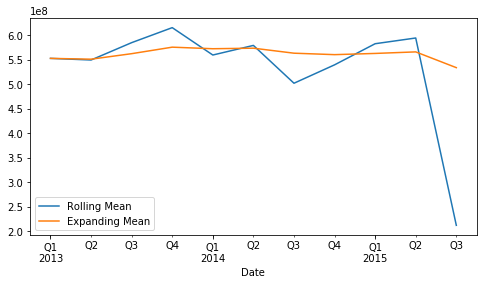

In [57]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8,4]
fig, ax = plt.subplots()
rolling_mean.plot(legend = True)
expanding_mean.plot(legend = True)
ax.legend(['Rolling Mean', 'Expanding Mean'])

## f. Exponentially weighted windows

In Exponentially weighted the averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of time points that are further in the past.

The (adjusted) exponentially weighted mean for time, $t$, is defined as:

<a id="-xt--fracxt-----alphaxt------alphaxt--------alphatx------alpha-----alpha-------alphat-"></a>
### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

> **Note:** Review Pandas' [documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows) for more information.

**Calculate and plot the exponentially weighted sum along with the rolling sum. What's the difference?**

For example: `.resample('Q').sum().ewm(span=10).mean()`.

In [58]:
rolling_mean = data.Sales.resample('Q').sum().rolling(window=2, center=True).mean()
exp_weighted_mean = data.Sales.resample('Q').sum().ewm(span=10).mean()

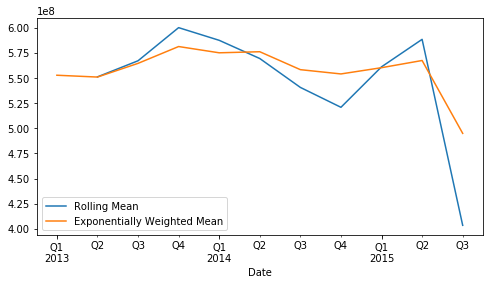

In [503]:
plt.rcParams["figure.figsize"] = [8,4]
fig, ax = plt.subplots()
rolling_mean.plot(legend = True)
exp_weighted_mean.plot(legend = True)
ax.legend(['Rolling Mean', 'Exponentially Weighted Mean'])

In [504]:
### Example

# iii. Modeling


- Naive
- Simple Average
- Moving Average
- Simple Exponential Smoothing
- Holt's Linear Trend
- Holt Winter's Method
- ARIMA

We will be modeling with Walmart sales data

In [902]:
walmart = pd.read_csv('data/train.csv')
walmart.set_index('Date', inplace=True)
walmart.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [903]:
store1 = walmart[walmart.Store == 1]
store1_sales = pd.DataFrame(store1.Weekly_Sales.groupby(store1.index).sum())
store1_sales.reset_index(inplace = True)
store1_sales['Date'] = pd.to_datetime(store1_sales['Date'])
store1_sales.set_index('Date',inplace = True)

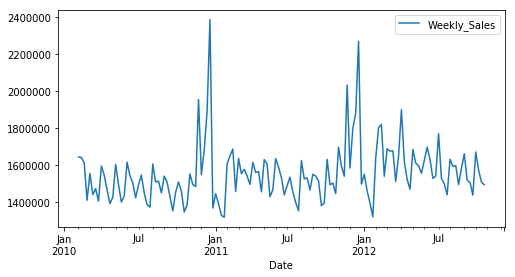

In [904]:
store1_sales.plot()

In [905]:
train = store1_sales['2010': '2011']
test = store1_sales['2012']

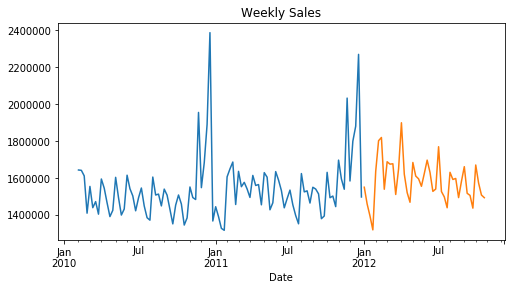

In [906]:
train.Weekly_Sales.plot(figsize=(8,4), title= 'Weekly Sales')
test.Weekly_Sales.plot(figsize=(8,4), title= 'Weekly Sales')
plt.show()

### a. Naive Method

Guessing the latest point forward

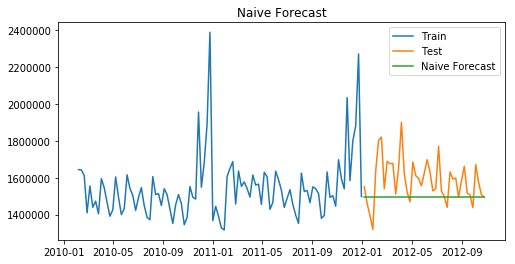

In [907]:
dd= np.asarray(train.Weekly_Sales)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index,test['Weekly_Sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

###### We Can Check the Root Mean Squared Error

In [908]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Weekly_Sales, y_hat.naive))
print(rms)

144192.4921506529


## b. Simple Average

**Simple average** is a useful method when the outputs vary evenly across a constant mean. <br>
The prediction is the average of all of the previous time periods. 

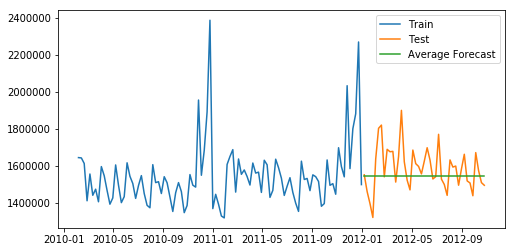

In [909]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Weekly_Sales'].mean()
#plt.figure(figsize=(12,8))
plt.plot(train['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [910]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Weekly_Sales, y_hat_avg.avg_forecast))
print(rms)

121981.78781090611


## c. Moving Average

Moving average predicts the mean of a window lenght that is selected

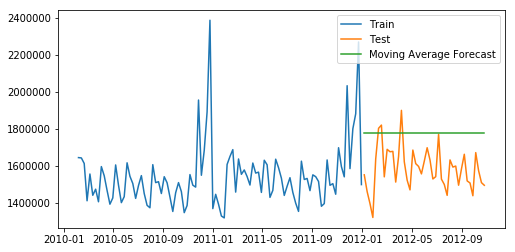

In [911]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Weekly_Sales'].rolling(8).mean().iloc[-1]
#plt.figure(figsize=(16,8))
plt.plot(train['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [912]:
rms = sqrt(mean_squared_error(test.Weekly_Sales, y_hat_avg.moving_avg_forecast))
print(rms)

220538.43986419958


### Why didn't this approach do well?

## d. Simple Exponential Smoothing 

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly


<b> We might want to weight more recent points more heavily than the past points. <br>
Exponential Weighted Moving Average or (Simple Exponential Smoothing) gives points weights. </b>


The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

A common weight is: <br>
    
 $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

Notice how each point further away is exponentially weighted

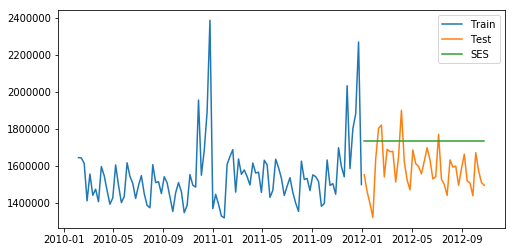

In [913]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#from statsmodels.tsa.holtwinters import ExponentialSmoothing


y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Weekly_Sales'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
#plt.figure(figsize=(16,8))
plt.plot(train['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [914]:
rms = sqrt(mean_squared_error(test.Weekly_Sales, y_hat_avg.SES))
print(rms)

188369.92416964


## e. Holt's Linear Trend (Double Exponential Smoothing)

With Simple Exponential smoothing we calculate a mean point by prioritizing new points

<b> But what if we want to add other factors like trends or seasonality </b>

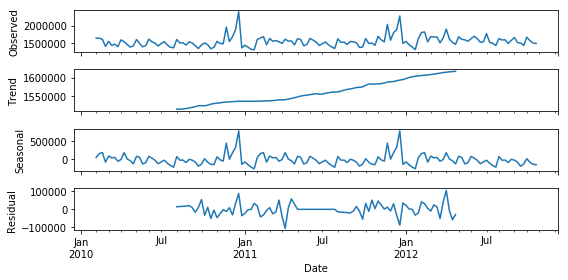

In [915]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = store1_sales
result = seasonal_decompose(series, model='additive')

result.plot()
plt.show()

### Holts Linear Trend Takes into Account the Trend to Predict 

Holt's linear trend is exponential smoothing applied to both the average value of the series (called "level") and trend. 

To generate the forecasting equation, we will add these equations together. 

<h3><center>Level Equation</center></h3>: $$\ell_t = \alpha y_t + (1 - \alpha)(\ell_{t-1} + b_{t-1})$$ 
<h3><center>Trend Equation</center></h3>: $$b_t = \beta *(\ell_t - \ell_{t-1}) + (1 - \beta)b_{t-1}$$

We will add these equations together to generate the forecast equation. 

<h3><center>Forecast Equation</center></h3>: 
$$\hat y_{t+h|1}= \ell_t + hb_t $$



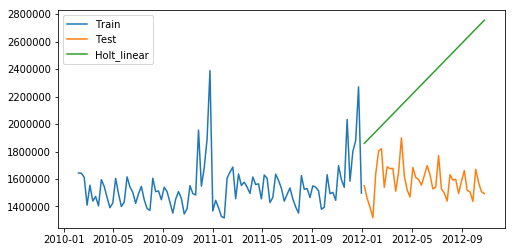

In [916]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Weekly_Sales'])).fit(smoothing_level = 0.3,
                                                   smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

#plt.figure(figsize=(16,8))
plt.plot(train['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [917]:
rms = sqrt(mean_squared_error(test.Weekly_Sales, y_hat_avg.Holt_linear))
print(rms)

781856.6060260109


## f. Holt-Winters Method (Triple Exponential Smoothing)

Now we will include a seasonal parameter

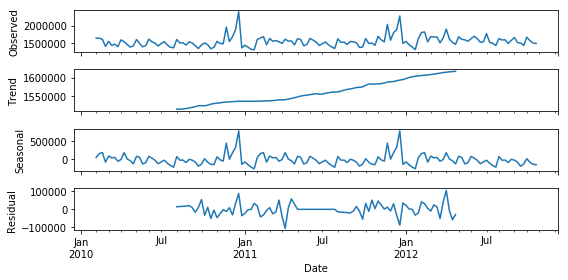

In [918]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = store1_sales
result = seasonal_decompose(series, model='additive')

result.plot()
plt.show()

<h3><center>Level Equation</center></h3> $$L_t = \alpha (y_t - S_{t-s}) + (1 - \alpha)(L_{t-1} + b_{t-1})$$ 
<h3><center>Trend Equation</center></h3> $$b_t = \beta *(L_t - L_{t-1}) + (1 - \beta)b_{t-1}$$
<h3><center>Seasonality Equation</center></h3> $$S_t = \gamma(y_t-L_t)+(1-\gamma)S_{t-s}$$
<h3><center>Forecast Equation</center></h3> $$F_{t+k} = L_t + kb_t+S_{t+k-s}$$

(Where `α`, `β`, and `γ` are the smoothing parameters — each between 0 and 1 — and `s` is the length of the seasonal cycle.)

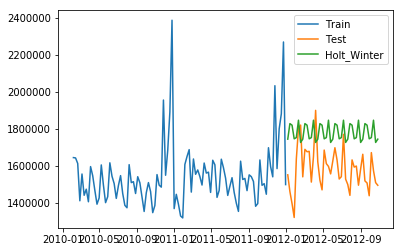

In [1156]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Weekly_Sales']) ,
                            seasonal_periods=7 ,
                            trend='add', 
                            seasonal='mul',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
##plt.figure(figsize=(16,8))
plt.plot( train['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [1157]:
rms = sqrt(mean_squared_error(test.Weekly_Sales, y_hat_avg.Holt_Winter))
print(rms)

228805.36405509568


## g. Auto Regressive Integrated Moving Average (ARIMA )

- Prerequisites 
- Parts & Coefficients
- Application

### Prerequisite

Arime needs the data to be stationary.

Data is stationary when the mean, variance, and covarience are constant.
Non stationary data has no trend or seasonality

Mean
![](assets/mean.png)

Variance
![](assets/variance.png)

Covariance
![](assets/covariance.png)

In [921]:
# flights = pd.read_csv('data/airline_passengers.csv')
# flights.columns = [i.lower().replace(' ', '_') for i in flights.columns]
# flights['month'] = pd.to_datetime(flights.month)

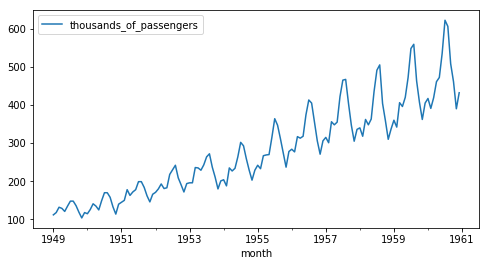

In [922]:
flights.plot()

We can non-stationary data by differencing

Differcing subtracting lag values to current values.

In [923]:
shifted_forward = flights.shift(1)

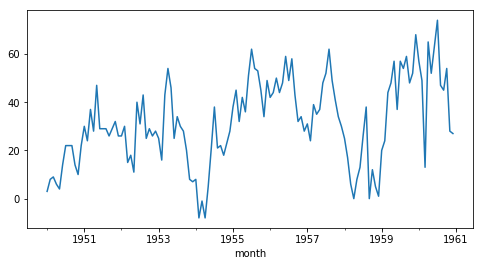

In [924]:
flights.thousands_of_passengers.diff(periods = 12).plot()





## Parts & Coefficients:

ARIMA is made up of 3 different models:

- <b>AR(p) Autoregression</b> - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
- <b>I(d) Integration </b> - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
- <b>MA(q) Moving Average </b> - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.




<b> Autoregressive Model </b>

You can use the same linear regression formula but instead of having the features be other descriptions, they can be the previous points

![](assets/linear_reg.png)


Now with each prior point being the previous point

![](assets/auto_reg.png)

Where y(t-1) is a previous point and phi is the lag coefficient

In [925]:
from statsmodels.tsa.ar_model import AR,ARResults

In [926]:
model = AR(train)
AR1fit = model.fit()
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 12
Coefficients:
const               828240.813940
L1.Weekly_Sales          0.341334
L2.Weekly_Sales          0.086891
L3.Weekly_Sales         -0.041811
L4.Weekly_Sales          0.435988
L5.Weekly_Sales         -0.396139
L6.Weekly_Sales         -0.057424
L7.Weekly_Sales          0.180188
L8.Weekly_Sales         -0.233570
L9.Weekly_Sales          0.177040
L10.Weekly_Sales         0.030966
L11.Weekly_Sales        -0.131060
L12.Weekly_Sales         0.073146
dtype: float64


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [927]:
start = len(train)
end = len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

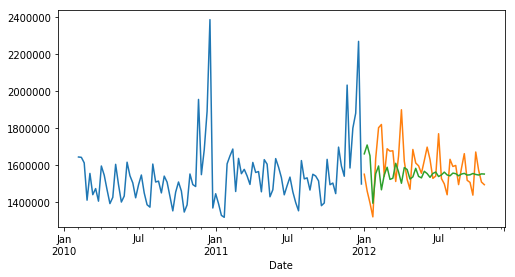

In [928]:
train.Weekly_Sales.plot()
test.Weekly_Sales.plot()
predictions1.plot()

In [929]:
sqrt(mean_squared_error(predictions1, test))

132350.10368829928

<b> Moving Average </b><br>
We will be using an autoregression model on the errors of the autoregression

This does not have anything to do with the moving average transformation, the name is misleading.

A simple autoregression model of this structure can be used to predict the forecast error, which in turn can be used to correct forecasts. This type of model is called a moving average model, the same name but very different from moving average smoothing.

![](assets/moving_average.png)

In [930]:
predictions_total = AR1fit.predict(start=12, end=len(train)-1, dynamic=False).rename('AR(1) Predictions')

In [931]:
predictions_df = pd.DataFrame(predictions_total)
predictions_df.columns =['Weekly_Sales']

In [932]:
residuals = predictions_df.Weekly_Sales - train.Weekly_Sales[12:]

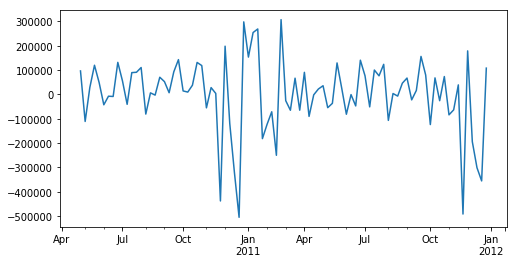

In [933]:
residuals.plot()

In [1076]:
model = AR(residuals)
model_fit = model.fit()

In [935]:
start = len(train)
end = len(train)+len(test)-13
residual_predictions = model_fit.predict(start=start-12, end=end, dynamic=False).rename('AR(1) Predictions')

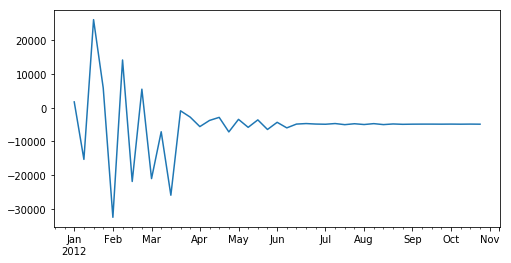

In [936]:
residual_predictions.plot()

In [937]:
new_predictions = residual_predictions + predictions1

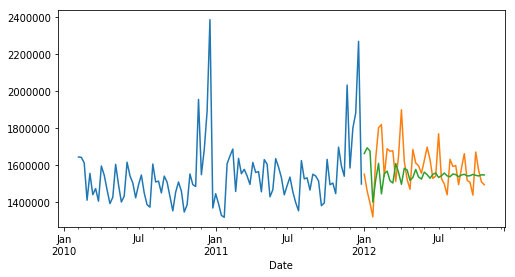

In [942]:
train.Weekly_Sales.plot()
test.Weekly_Sales.plot()
new_predictions.plot()

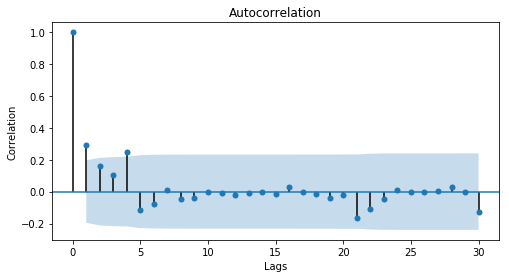

In [944]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train.Weekly_Sales, lags=30)
plt.ylabel('Correlation')
plt.xlabel('Lags')
plt.show()

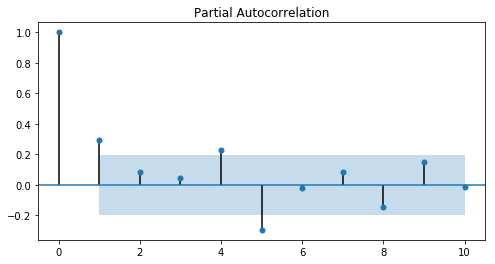

In [945]:
plot_pacf(train.Weekly_Sales, lags=10)
plt.show()

In [984]:
from statsmodels.tsa.arima_model import ARMA

In [1078]:
arma = ARMA(train, order=(12,1))
arma_fit = arma.fit()
arma_predictions = arma_fit.predict(start=test.index[0], end=test.index[-1], dynamic=True)

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


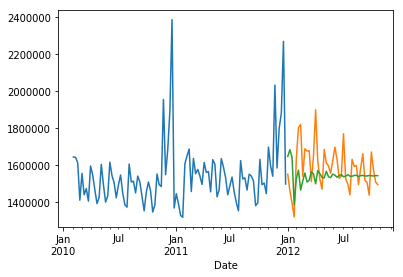

In [1119]:
train.Weekly_Sales.plot()
test.Weekly_Sales.plot()
arma_predictions.plot()

In [1082]:
sqrt(mean_squared_error(arma_predictions, test))

133749.7849487439

In [1083]:
sqrt(mean_squared_error(new_predictions, test))

136778.52155594397

## ARIMA - Moving Average and AutoRegression

Code Along

In [1115]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(train.Weekly_Sales,order = (4,1,1)).fit()


arima_predictions = arima.predict(start=test.index[0], end=test.index[-1], dynamic=True)

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


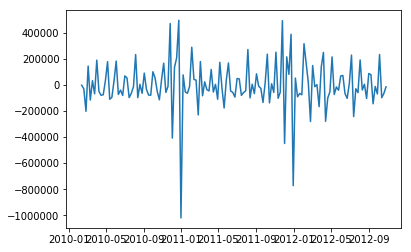

In [1116]:
plt.plot(store1_sales - store1_sales.shift(1))

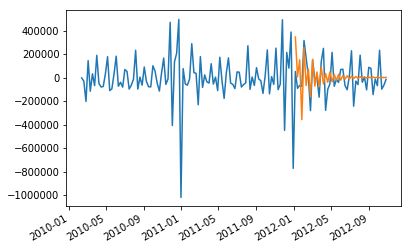

In [1117]:
differenced_df = store1_sales - store1_sales.shift(1)
plt.plot(differenced_df)
arima_predictions.plot()

In [1040]:
differenced_test = differenced_df['2012']

In [1041]:
sqrt(mean_squared_error(arima_predictions, differenced_test))

143752.18615068911

<h2><a id="D">Independent Practice</a></h2>

**Instructor Note**: These are optional and can be assigned as student practice questions outside of class.

In [1101]:
import pandas as pd
from datetime import timedelta
%matplotlib inline

water = pd.read_csv('data/water.csv')

In [1106]:
water['year'] = [str(i)+'-01-01' for i in water.Year]

In [1107]:
water.index = pd.to_datetime(water.year)

In [1110]:
water = water.copy('deep')[['Water']]

In [1111]:
water.head()

,Water
year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413


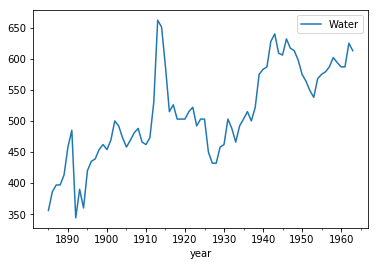

In [1114]:
water.plot()

## Do Exploratory Analysis

- Box Plots
- AutoCorrelation Plots
- Rolling Means
- Difference Year Over Year
- Is there seasonality or trends?

### Run Holt Winters

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


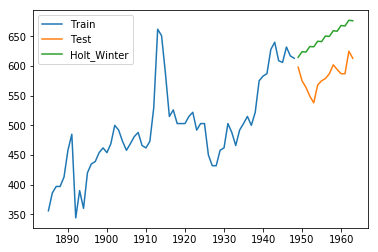

In [1268]:
y_hat_avg = water_test.copy()
fit1 = ExponentialSmoothing(water_train.Water ,
                            seasonal_periods=2 ,
                            trend='add', 
                            seasonal='mul',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(water_test))
##plt.figure(figsize=(16,8))
plt.plot( water_train.Water, label='Train')
plt.plot(water_test.Water, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [1269]:
sqrt(mean_squared_error(y_hat_avg['Holt_Winter'], water_test))

67.49076543422542

### Run Arma

Look at the autocorrelation plot to decide on the autoregression # of lags

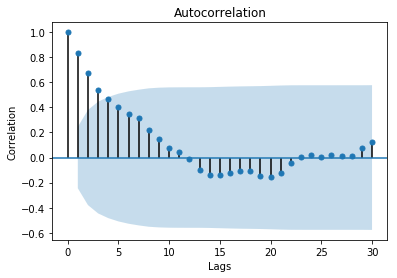

In [1211]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(water_train.Water, lags=30)
plt.ylabel('Correlation')
plt.xlabel('Lags')
plt.show()

Look at the partial-autocorrelation plot to decide on the MA # of lags

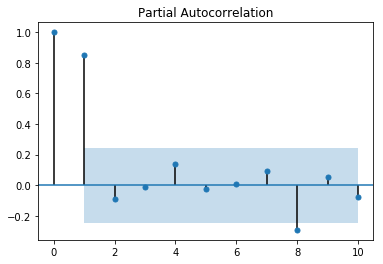

In [1212]:
plot_pacf(water_train.Water, lags=10)
plt.show()

In [1213]:
from statsmodels.tsa.arima_model import ARMA

In [1183]:
water_arma = ARMA(water_train, order=(4,1))
water_arma_fit = arma.fit()
water_arma_predictions = water_arma_fit.predict(start=water_test.index[0], end=water_test.index[-1], dynamic=True)

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


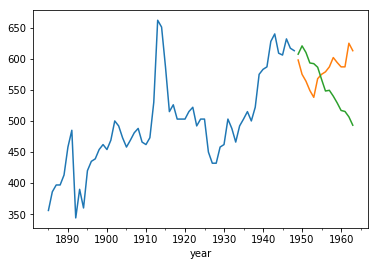

In [1185]:
water_train.Water.plot()
water_test.Water.plot()
water_arma_predictions.plot()

In [1187]:
sqrt(mean_squared_error(water_arma_predictions, water_test))

62.4426776543282

### Run Arima

Does the data need to be differenced?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c4ee4a7f0>]],
      dtype=object)

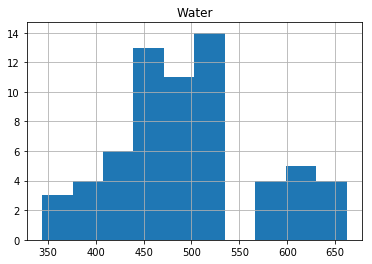

In [1210]:
water_train.hist()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [1207]:
ar_lag = 4
differenced = 1
ma_lag = 1


water_arima = ARIMA(water_train, order=(ar_lag,differenced,ma_lag))
water_arima_fit = water_arima.fit()
water_arima_predictions = water_arima_fit.predict(start=water_test.index[0], end=water_test.index[-1], dynamic=True)

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


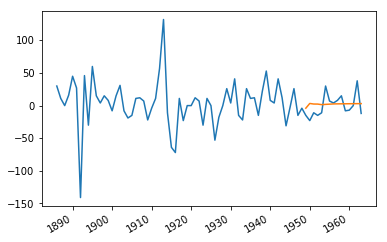

In [1208]:
water_differenced = water - water.shift(differenced)
plt.plot(water_differenced)
water_arima_predictions.plot()

In [1209]:
sqrt(mean_squared_error(water_arima_predictions, water_test))

62.4426776543282